In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv('SleepHealthandLifestyle.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.columns = data.columns.str.strip()
data['Sleep Disorder'] = data['Sleep Disorder'].fillna("None")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
y = data['Quality of Sleep']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
# quantitative = data.select_dtypes(include=['int64', 'float64']).drop(columns="Quality of Sleep")
quantitative = data.select_dtypes(include=['int64', 'float64'])
qualitative  = data.select_dtypes(include=['object'])
qualitative["BMI Category"] = qualitative["BMI Category"].replace("Normal Weight", "Normal")
qualitative.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea


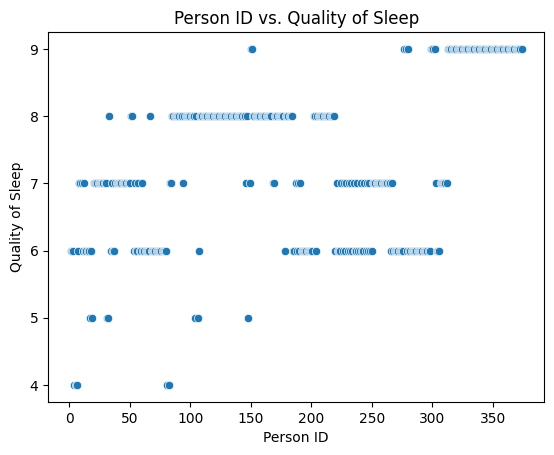

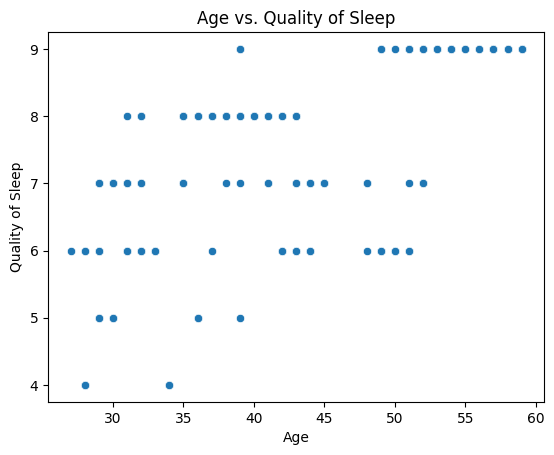

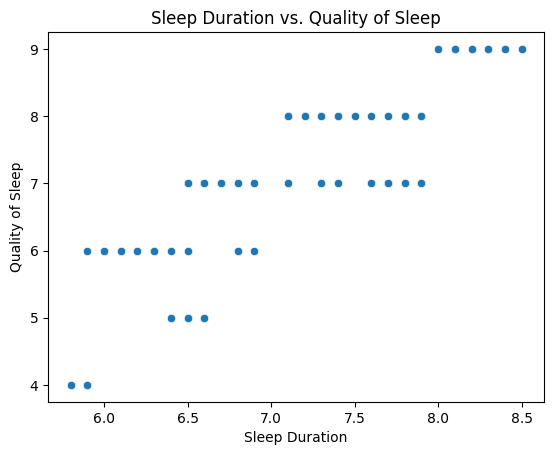

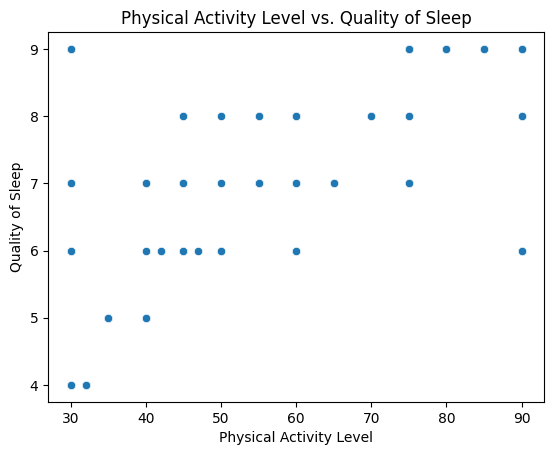

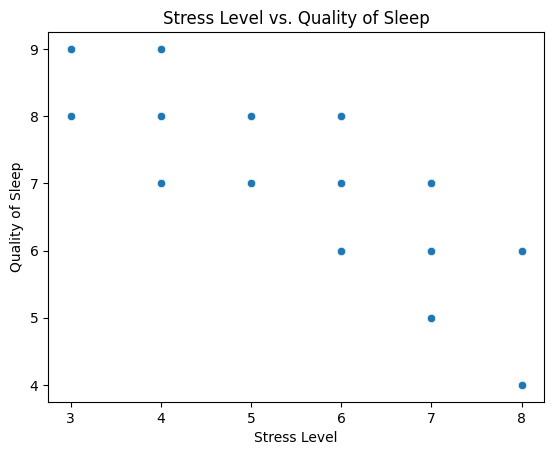

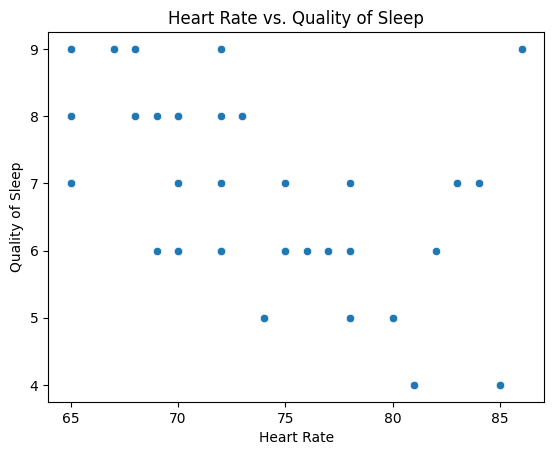

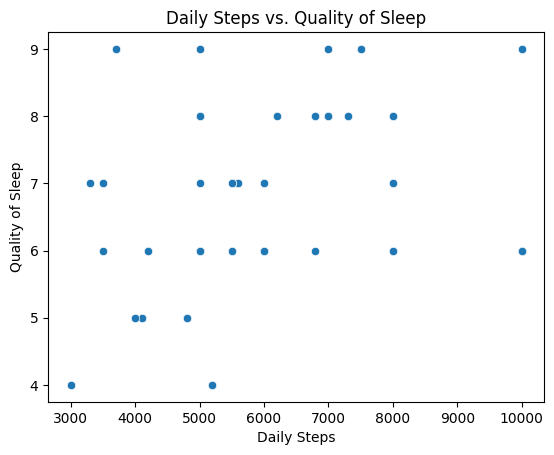

In [9]:
# Quantitative visual analysis:
for col in quantitative.columns:
    if col != "Quality of Sleep":
        sns.scatterplot(x=quantitative[col], y=quantitative["Quality of Sleep"])
        plt.title(f'{col} vs. Quality of Sleep')
        plt.xlabel(col)
        plt.ylabel('Quality of Sleep')
        plt.show()
        


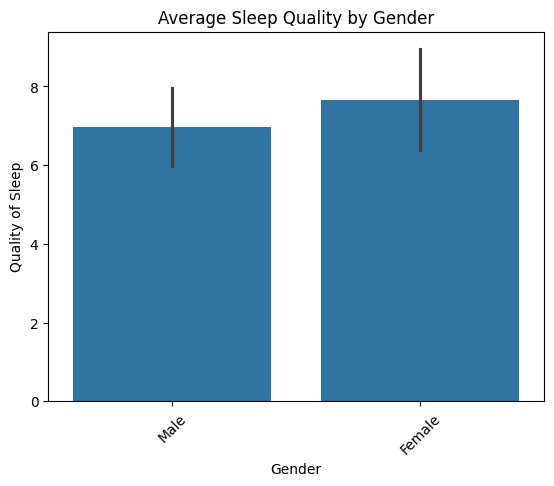

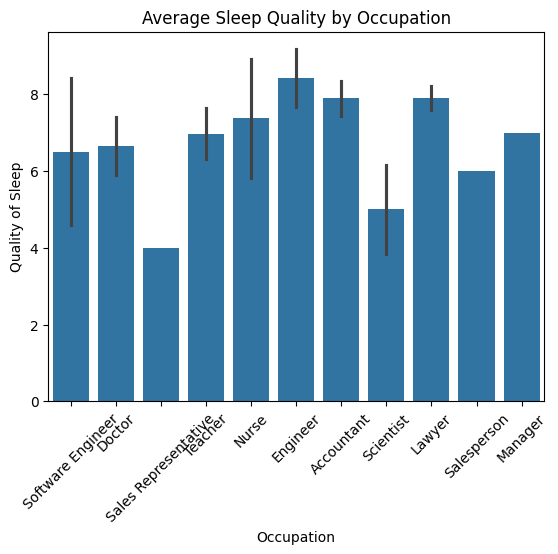

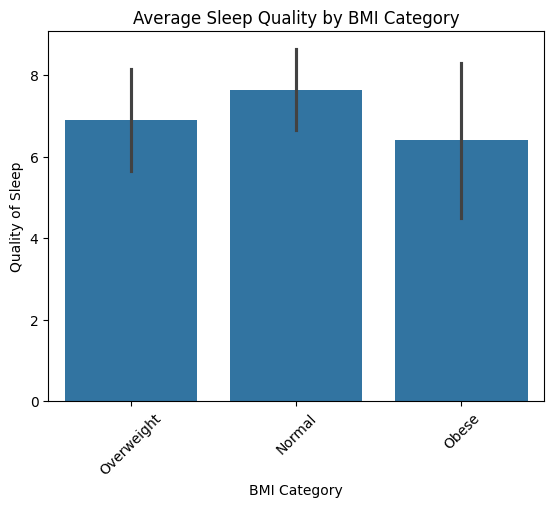

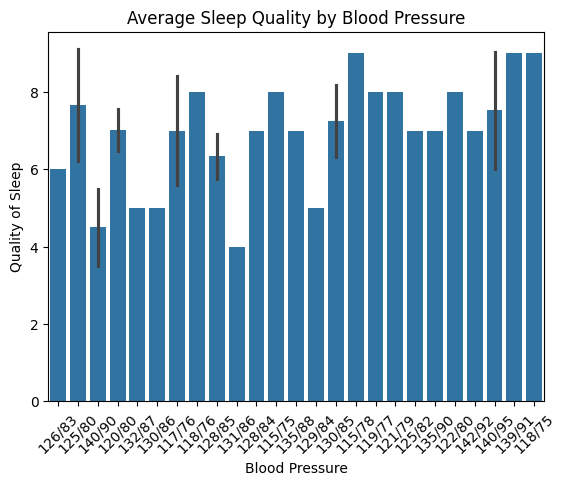

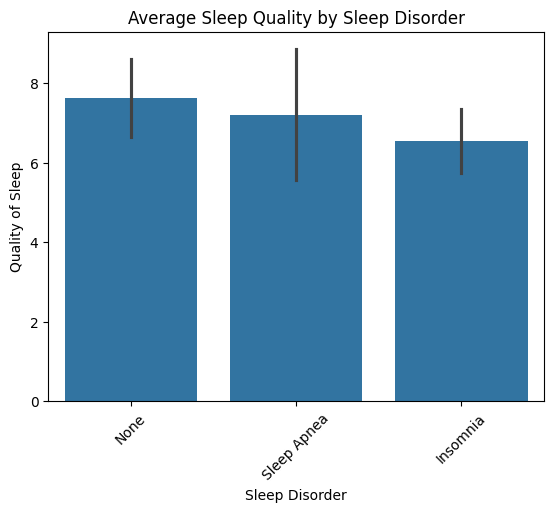

In [10]:
# Qualitative Visual Analysis: 
qualitative["Quality of Sleep"] = y

for col in qualitative.columns:
    if col != "Quality of Sleep":
        sns.barplot(x=col, y='Quality of Sleep', data=qualitative, estimator='mean', errorbar='sd') 
        plt.title(f"Average Sleep Quality by {col}")
        plt.xticks(rotation=45)
        plt.show()



In [16]:
# Ideas for statistical testing:
# Numerical vs Numerical: Pearson Correlation
# Categorical vs Numerical: T-tests could be used

for col in quantitative.columns:
    if col != "Quality of Sleep":
        result = stats.pearsonr(quantitative[col], quantitative["Quality of Sleep"])
        print(f"Results of {col}")
        print(result)

# Notes for after Pearson:
# Sleep Duration has a high positive correlation with Quality of Sleep
# Stress level has a high negative orrelation with Quality of Sleep
# Heart Rate sort of has a negative correlation with Quality of Sleep


Results of Person ID
PearsonRResult(statistic=np.float64(0.4316120785527803), pvalue=np.float64(2.1076887217148565e-18))
Results of Age
PearsonRResult(statistic=np.float64(0.4737338761619899), pvalue=np.float64(2.553119182302206e-22))
Results of Sleep Duration
PearsonRResult(statistic=np.float64(0.8832130004106183), pvalue=np.float64(2.1709917708648735e-124))
Results of Physical Activity Level
PearsonRResult(statistic=np.float64(0.19289645493975327), pvalue=np.float64(0.00017454895247838884))
Results of Stress Level
PearsonRResult(statistic=np.float64(-0.8987520310040416), pvalue=np.float64(2.880124240943373e-135))
Results of Heart Rate
PearsonRResult(statistic=np.float64(-0.6598647331480081), pvalue=np.float64(4.131998623366946e-48))
Results of Daily Steps
PearsonRResult(statistic=np.float64(0.01679141492471675), pvalue=np.float64(0.7461906652961113))


In [18]:
# Variables: 

# 2 options: Gender
# 3 Options: BMI Category, Sleep Disorder
# Multiple options: Occupation, Blood Pressure
# 2 options test: t-test:
group1 = qualitative[qualitative['Gender'] == 'Male']['Quality of Sleep']
group2 = qualitative[qualitative['Gender'] == 'Female']['Quality of Sleep']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"Test Statistic: {t_stat}, p-value: {p_val}")


Test Statistic: -5.874547760454642, p-value: 9.416446532689304e-09


In [ ]:
# 3 options: ANOVA
group1 = qualitative[qualitative['BMI Category'] == 'Normal']['Quality of Sleep']
group2 = qualitative[qualitative['BMI Category'] == 'Overweight']['Quality of Sleep']
group3 = qualitative[qualitative['BMI Category'] == 'Obese']['Quality of Sleep']

f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"ANOVA statistic for BMI: {f_stat}. ANOVA p-value: {p_val}")

group1 = qualitative[qualitative['Sleep Disorder'] == 'None']['Quality of Sleep']
group2 = qualitative[qualitative['Sleep Disorder'] == 'Sleep Apnea']['Quality of Sleep']
group3 = qualitative[qualitative['Sleep Disorder'] == 'Insomnia']['Quality of Sleep']
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"ANOVA statistic for Sleep Disorder: {f_stat}. ANOVA p-value: {p_val}")




ANOVA statistic for BMI: 22.01139140051276. ANOVA p-value: 9.257968894758679e-10
ANOVA statistic for Sleep Disorder: 27.60060353397405. ANOVA p-value: 6.688642015486708e-12


In [24]:
# Multiple options: ANOVA
groups1 = [group['Quality of Sleep'].values for name, group in qualitative.groupby("Occupation")]
groups2 = [group['Quality of Sleep'].values for name, group in qualitative.groupby("Blood Pressure")]

f_stat, p_val = stats.f_oneway(*groups1)
print(f"ANOVA statistic for Occupation: {f_stat}, ANOVA p-value: {p_val}")

f_stat, p_val = stats.f_oneway(*groups2)
print(f"ANOVA statistic for Occupation: {f_stat}, ANOVA p-value: {p_val}")

ANOVA statistic for Occupation: 30.0221666625311, ANOVA p-value: 6.393556653658923e-42
ANOVA statistic for Occupation: 5.71676564441783, ANOVA p-value: 1.3267836112753385e-14


# Experiment Checklist:
1. Regression Problem or Classification Problem? 
a. It might be a good idea to do a classification problem, and bin the groups of values of Sleep Quality to be different categories (Low, medium, high)
2. Feature Engineering:
a. Will need to experiment with moving forward with machine learning models. Which features would be the best to add? Could use a process 
by adding each feature to a model and removing it if it doesn't help the performance. (Greedy feature selection)

b. Steps for Feature Engineering: 

    1. Bin things like Quality of Sleep into "Low", "Medium", "High", etc. 
    2. Create interaction features: Things like Steps/Sleep Duration, etc.
    3. Normalize or Scale features: Features like "Steps" can have a different scale than others. 
    4. Convert Categorical Variables: Convert binary features to 1's and 0's. For Multi-class, you can use ordinal encoding or something similar. 
    5. Potentially recode "low-value" categories: If something isn't showing up that much or isn't meaningful, classify it as "Other"
    6. Can create flags or binary features for things like "Obesiety"




